### We read in the data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../mlnn-main/data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


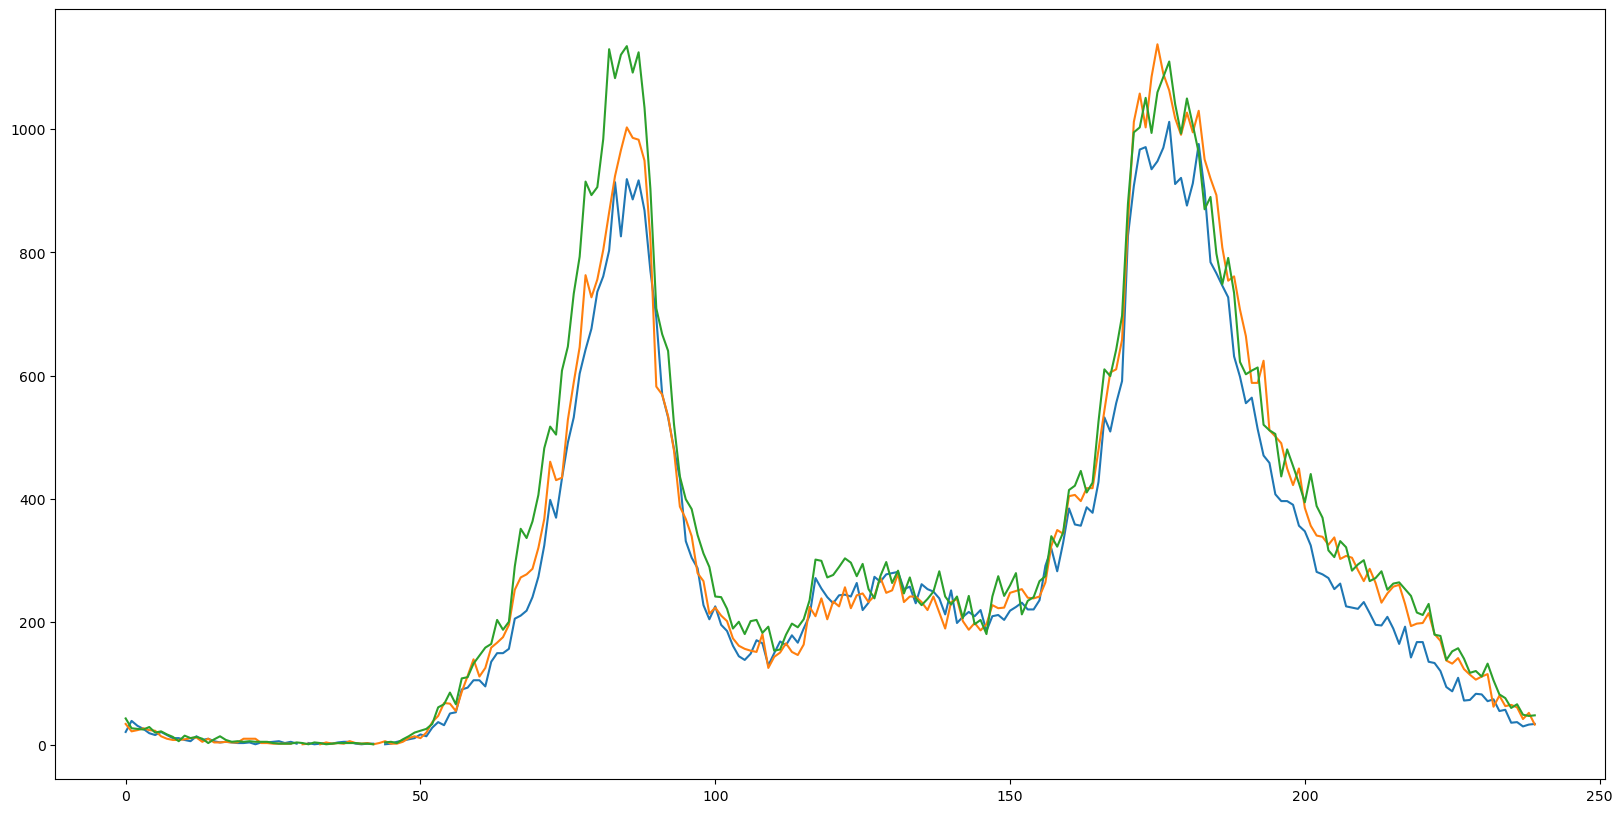

In [3]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [4]:
# Create 4 data sets, each with the hour and only one day.
# Fill in any missing values with a value of 0.
monday = day_hour_count[["hour","monday"]].copy().fillna(0)
tuesday = day_hour_count[["hour","tuesday"]].copy().fillna(0)
saturday = day_hour_count[["hour","saturday"]].copy().fillna(0)
sunday = day_hour_count[["hour","sunday"]].copy().fillna(0)



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [5]:
# Import libraries from sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

Text(0.5, 1.0, 'Monday')

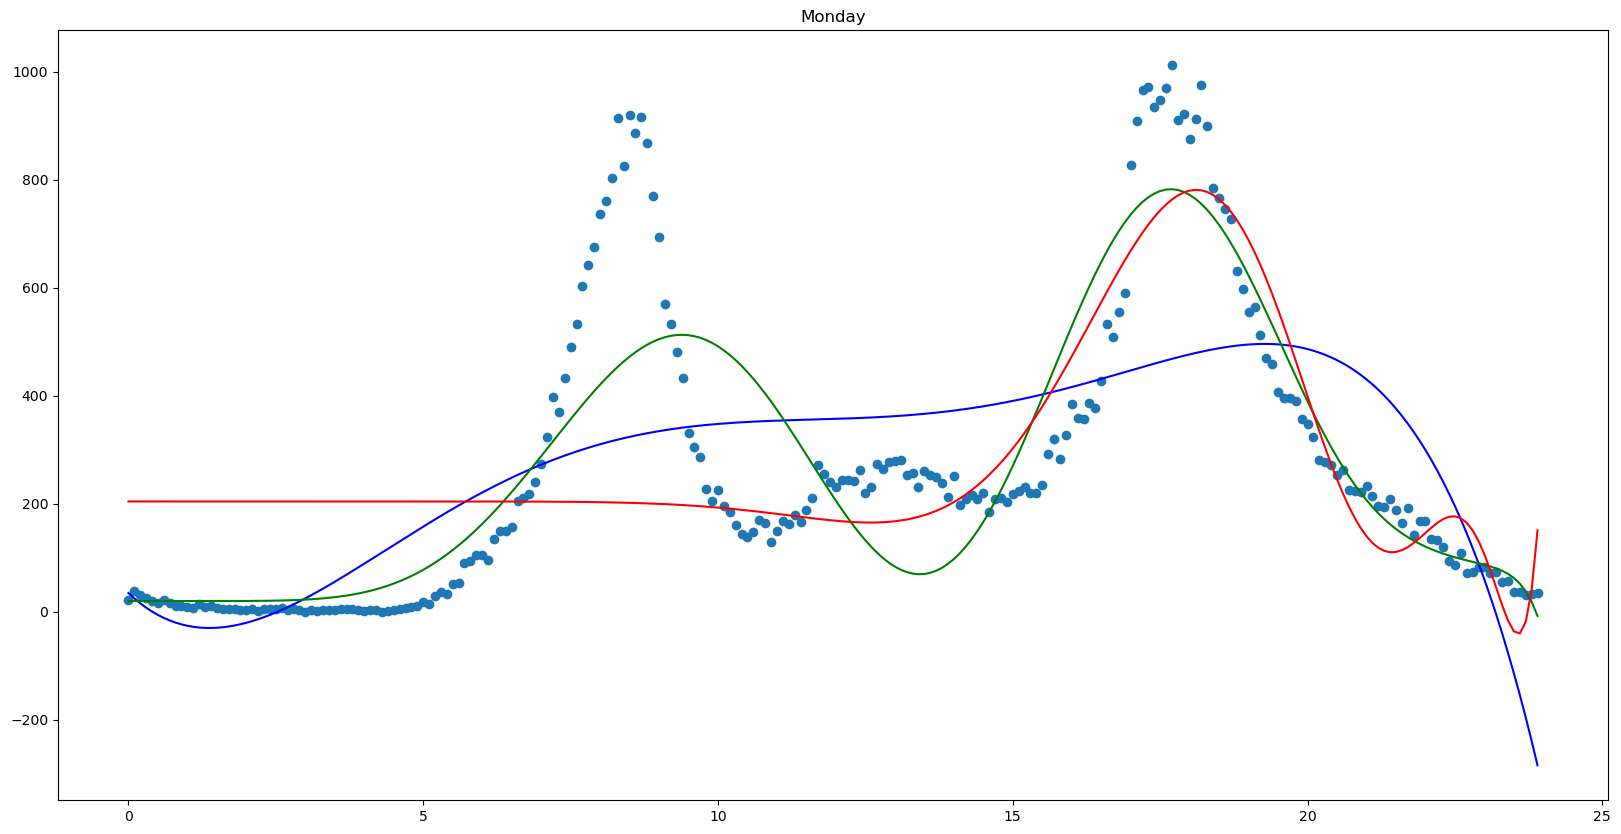

In [6]:
# Create an initial set of x and y data for Monday
xmon = monday[["hour"]]
ymon = monday[["monday"]]

# Create three polynomial features of different degrees
xmon5 = PolynomialFeatures(degree=5).fit_transform(monday[["hour"]])
xmon15 = PolynomialFeatures(degree=15).fit_transform(monday[["hour"]])
xmon20 = PolynomialFeatures(degree=20).fit_transform(monday[["hour"]])

# Fit linear models to each polynomial feature set
monday5 = linear_model.LinearRegression()
monday5.fit(xmon5, ymon)

monday15 = linear_model.LinearRegression()
monday15.fit(xmon15, ymon)

monday20 = linear_model.LinearRegression()
monday20.fit(xmon20, ymon)

# And plot predictions for all three models against the original data for Monday
plt.scatter(xmon, ymon)
plt.plot(xmon, monday5.predict(xmon5), c='b')
plt.plot(xmon, monday15.predict(xmon15), c='g')
plt.plot(xmon, monday20.predict(xmon20), c='r')
plt.title("Monday")


### Model Selection
__Based on the above chart, none of the 3 models - 5th degree in blue, 15th degree in green, and 20th degree in red - fits the original data perfectly. However, of the three, the 15th degree does capture the dual-peak nature of the data, recognizing the peak between about 8 - 10, and a second peak from about 17 - 20. The 5th degree model shows more of a steady increase throughout the day befroe a sudden drop off at 20, and the 20th degree model completely misses the first peak. Based on the 15th degree model capturing the two major peaks in the data, I chose this model for prediction and testing.__

## 2b. Repeat `2a` for `saturday`

Text(0.5, 1.0, 'Saturday')

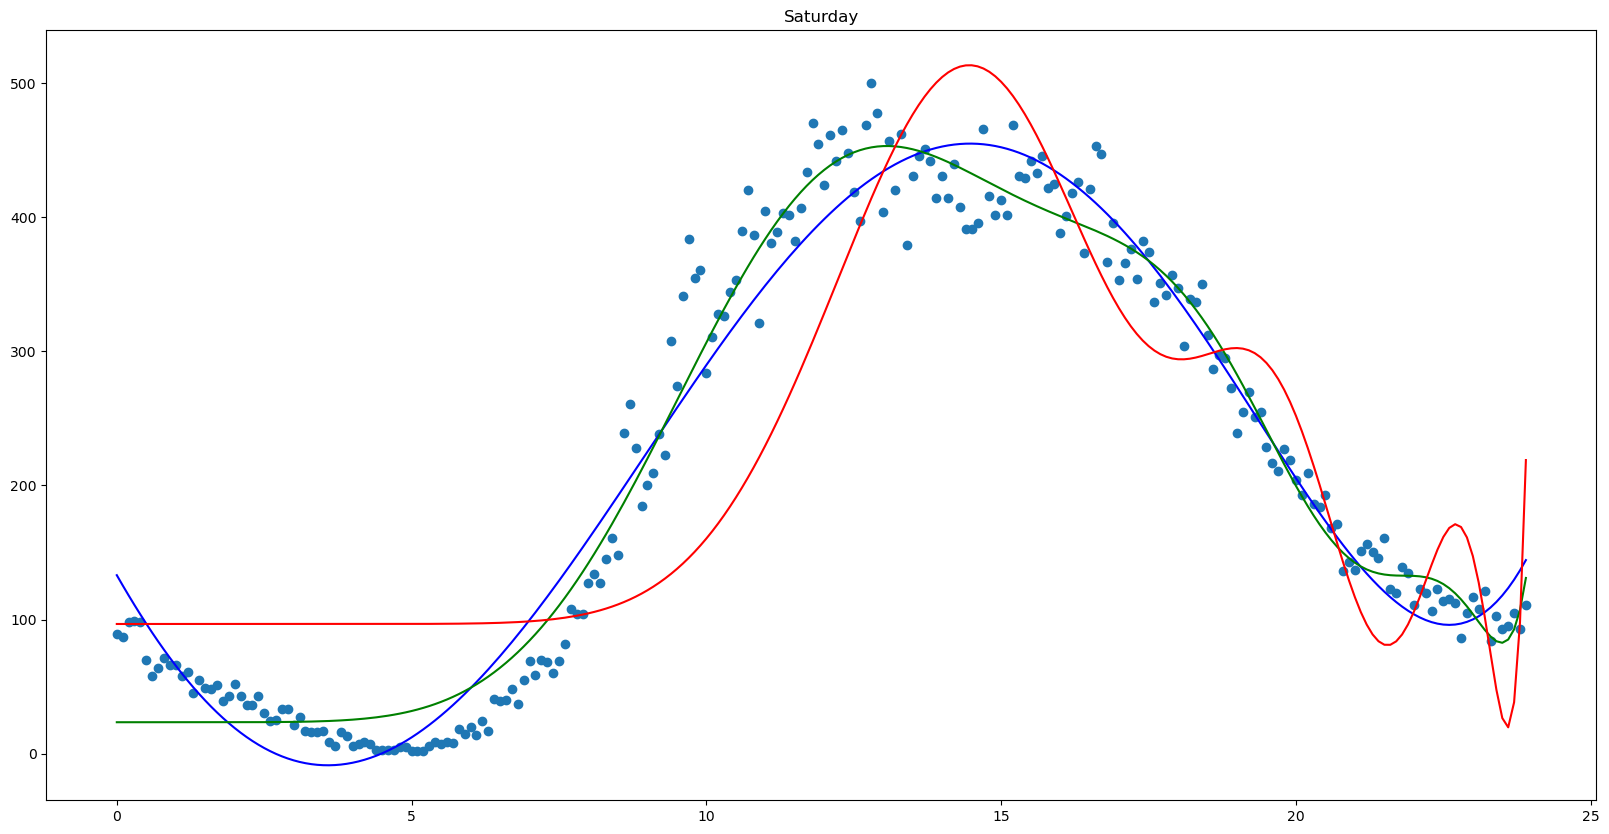

In [7]:
# Create an initial set of x and y data for Saturday
xsat = saturday[["hour"]]
ysat = saturday[["saturday"]]

# Create three polynomial features of different degrees
xsat5 = PolynomialFeatures(degree=5).fit_transform(saturday[["hour"]])
xsat15 = PolynomialFeatures(degree=15).fit_transform(saturday[["hour"]])
xsat20 = PolynomialFeatures(degree=20).fit_transform(saturday[["hour"]])

# Fit linear models to each polynomial feature set
saturday5 = linear_model.LinearRegression()
saturday5.fit(xsat5, ysat)

saturday15 = linear_model.LinearRegression()
saturday15.fit(xsat15, ysat)

saturday20 = linear_model.LinearRegression()
saturday20.fit(xsat20, ysat)

# And plot predictions for all three models against the original data for Monday
plt.scatter(xsat, ysat)
plt.plot(xsat, saturday5.predict(xsat5), c='b')
plt.plot(xsat, saturday15.predict(xsat15), c='g')
plt.plot(xsat, saturday20.predict(xsat20), c='r')
plt.title("Saturday")

### Model Selection
__This was a more difficult selection of models, as two of the models, 5ht degree in blue and 15th degree in green, provide good representations of the oriiginal data. The 20th degree model in red misses the slight dip at 5, and is far more erratic between 15 and 23, so was rejected. Ultiamtely, the 5th degree model provides a smoother interpretation of the original data, capturing the dip in the early morning and avoiding fluctuations in the afternoon that might indicate over-fitting. For this reason, I chose the 5th degree model for prediction and testing.__

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


In [8]:
from sklearn import metrics

#Monday/Tuesday
# NOTE the 15 degree polynomial model is the best fit for the data

# Get error values for Saturday
mse_mon = metrics.mean_squared_error(ymon, monday15.predict(xmon15))
mae_mon = metrics.mean_absolute_error(ymon, monday15.predict(xmon15))
mape_mon = metrics.mean_absolute_percentage_error(ymon, monday15.predict(xmon15))

# Get Polynomial Models for Tuesday data
xtues = tuesday[["hour"]]
ytues = tuesday[["tuesday"]]
xtues15 = PolynomialFeatures(degree=15).fit_transform(tuesday[["hour"]])

# Get error values for Tuesday by predicting TUesday values based on the Monday model,
# And comparing to the actual Tuesday values.
mse_tues = metrics.mean_squared_error(ytues, monday15.predict(xtues15)) 
mae_tues = metrics.mean_absolute_error(ytues, monday15.predict(xtues15))
mape_tues = metrics.mean_absolute_percentage_error(ytues, monday15.predict(xtues15))

# Print the error values for Monday and Tuesday
errors = {
    "MSE": [mse_mon, mse_tues],
    "MAE": [mae_mon, mae_tues],
    "MAPE": [mape_mon, mape_tues]
}
pd.DataFrame(errors, index=["Monday", "Tuesday"])


,MSE,MAE,MAPE
Monday,19252.727972,97.455696,1.250134e+15
Tuesday,23675.159997,105.145971,8.479128e+14


In [9]:
#Saturday/Sunday
# Get error values for Saturday
mse_sat = metrics.mean_squared_error(ysat, saturday5.predict(xsat5))
mae_sat = metrics.mean_absolute_error(ysat, saturday5.predict(xsat5))
mape_sat = metrics.mean_absolute_percentage_error(ysat, saturday5.predict(xsat5))

# Get Polynomial Models for Sunday data
xsun = sunday[["hour"]]
ysun = sunday[["sunday"]]
xsun5 = PolynomialFeatures(degree=5).fit_transform(sunday[["hour"]])

# Get error values for Sunday by predicting Sunday values based on the Saturday model,
# And comparing to the actual Sunday values.
mse_sun = metrics.mean_squared_error(ysun, saturday5.predict(xsun5)) 
mae_sun = metrics.mean_absolute_error(ysun, saturday5.predict(xsun5))
mape_sun = metrics.mean_absolute_percentage_error(ysun, saturday5.predict(xsun5))

# Print the error values for Saturday and Sunday
errors = {
    "MSE": [mse_sat, mse_sun],
    "MAE": [mae_sat, mae_sun],
    "MAPE": [mape_sat, mape_sun]
}
pd.DataFrame(errors, index=["Saturday", "Sunday"])

,MSE,MAE,MAPE
Saturday,995.216705,25.347170,0.469899
Sunday,1751.978564,33.091799,0.772315


## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

In [10]:
## Saturday

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain_sat, xtest_sat, ytrain_sat, ytest_sat = train_test_split(xsat, ysat, test_size=0.2)

# Fit a linear model to the training data.
# Note, this isn's really used.
linear_sat = linear_model.LinearRegression().fit(xtrain_sat, ytrain_sat)

# Create 5 degree polynomials for both the training and testing data.
xtrain5_sat = PolynomialFeatures(degree=5).fit_transform(xtrain_sat)
xtest5_sat = PolynomialFeatures(degree=5).fit_transform(xtest_sat)

# Fit a linear model to the 5th degree training data.
linear5_sat = linear_model.LinearRegression().fit(xtrain5_sat, ytrain_sat)

Text(0.5, 1.0, 'Saturday Predictions')

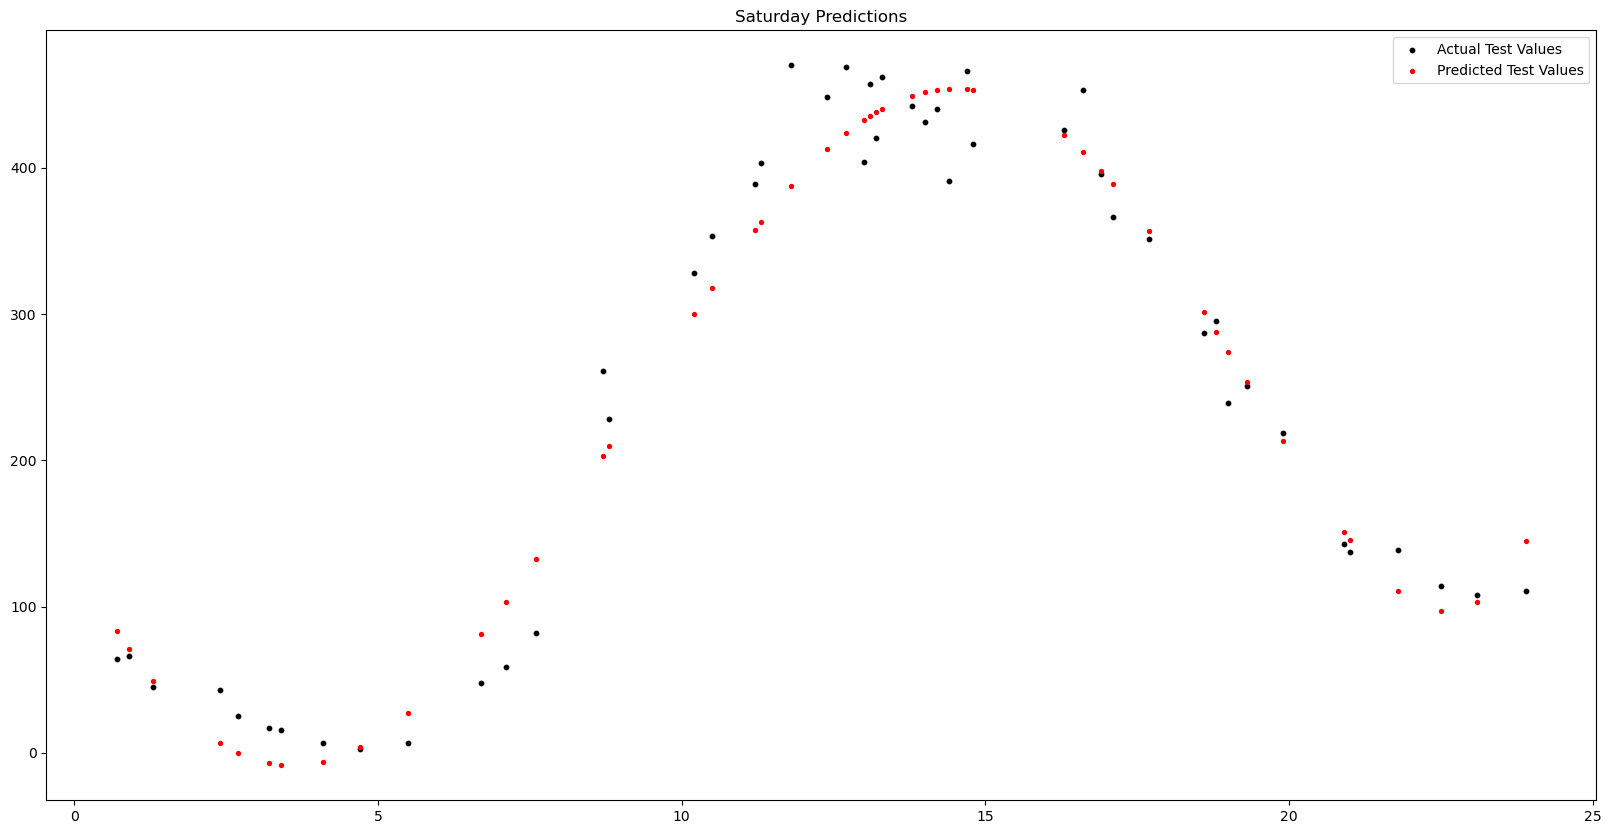

In [11]:
# Predict y values based on the 5th degree test data,
# using the linear model generated from the training data.
ypred_sat = linear5_sat.predict(xtest5_sat)

# Plot the test data in blue, followed by the predicted values in red.
plt.scatter(xtest_sat, ytest_sat, c='black', s=10, label='Actual Test Values')
plt.scatter(xtest_sat, ypred_sat, c='r', s=8, label = 'Predicted Test Values')
plt.legend()
plt.title("Saturday Predictions")

In [12]:

# Get error values based on actual test values and predicted test values.
mse_sat = metrics.mean_squared_error(ytest_sat, ypred_sat) 
mae_sat = metrics.mean_absolute_error(ytest_sat, ypred_sat)
mape_sat = metrics.mean_absolute_percentage_error(ytest_sat, ypred_sat)

# Print the error values for Saturday and Sunday
errors = {
    "MSE": [mse_sat],
    "MAE": [mae_sat],
    "MAPE": [mape_sat]
}
pd.DataFrame(errors, index=["Saturday"])

,MSE,MAE,MAPE
Saturday,889.46117,24.177654,0.316922


Text(0.5, 1.0, 'Monday Predictions')

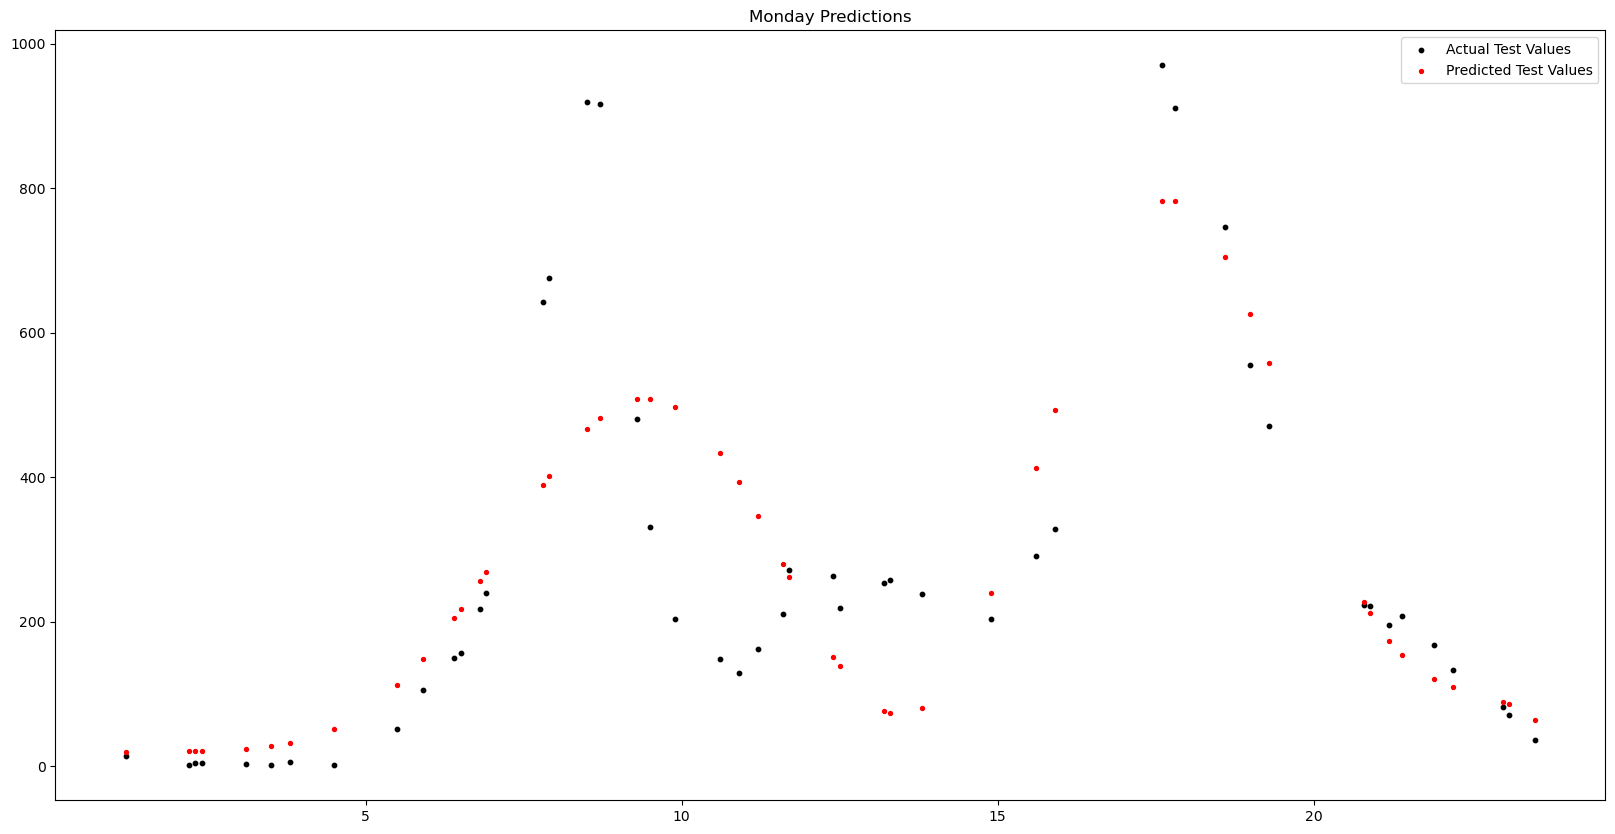

In [23]:
## Monday

# Split the data into training and testing sets
xtrain_mon, xtest_mon, ytrain_mon, ytest_mon = train_test_split(xmon, ymon, test_size=0.2)

# Create 15 degree polynomials for both the training and testing data.
xtrain15_mon = PolynomialFeatures(degree=15).fit_transform(xtrain_mon)
xtest15_mon = PolynomialFeatures(degree=15).fit_transform(xtest_mon)

# Fit a linear model to the 15th degree training data.
linear15_mon = linear_model.LinearRegression().fit(xtrain15_mon, ytrain_mon)

# Predict y values based on the 15th degree test data,
# using the linear model generated from the training data.
ypred_mon = linear15_mon.predict(xtest15_mon)

# Plot the test data in black, followed by the predicted values in red.
plt.scatter(xtest_mon, ytest_mon, c='black', s=10, label='Actual Test Values')
plt.scatter(xtest_mon, ypred_mon, c='r', s=8, label = 'Predicted Test Values')
plt.legend()
plt.title("Monday Predictions")

In [24]:
# Get error values based on actual test values and predicted test values.
mse_mon = metrics.mean_squared_error(ytest_mon, ypred_mon) 
mae_mon = metrics.mean_absolute_error(ytest_mon, ypred_mon)
mape_mon = metrics.mean_absolute_percentage_error(ytest_mon, ypred_mon)

# Print the error values for Saturday and Sunday
errors = {
    "MSE": [mse_mon],
    "MAE": [mae_mon],
    "MAPE": [mape_mon]
}
pd.DataFrame(errors, index=["Monday"])

,MSE,MAE,MAPE
Monday,22633.516236,103.118388,1.997554
